# Import Libaries

In [1]:
# import general model
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yahooFinance

# import prediction model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Data Loading

In [2]:
# Import Pertamina Stock price from Yahoo Finance
GetPertaminaInformation = yahooFinance.Ticker("PGEO.JK")
print(GetPertaminaInformation.info)

{'address1': 'Grha Pertamina - Pertamax Tower', 'address2': '7th Floor Jl. Medan Merdeka Timur No. 11-13, Gambir', 'city': 'Jakarta Pusat', 'zip': '10110', 'country': 'Indonesia', 'phone': '62 21 3983 3222', 'fax': '62 21 3983 3230', 'website': 'https://www.pge.pertamina.com', 'industry': 'Utilities - Renewable', 'industryKey': 'utilities-renewable', 'industryDisp': 'Utilities - Renewable', 'sector': 'Utilities', 'sectorKey': 'utilities', 'sectorDisp': 'Utilities', 'longBusinessSummary': 'PT Pertamina Geothermal Energy Tbk, together with its subsidiaries, engages in the development of geothermal energy in the upstream and downstream sectors in Indonesia and internationally. The company was founded in 2006 and is headquartered in Central Jakarta, Indonesia. PT Pertamina Geothermal Energy Tbk operates as a subsidiary of PT Pertamina Power Indonesia.', 'fullTimeEmployees': 502, 'companyOfficers': [{'maxAge': 1, 'name': 'Yulfi  Hadi', 'title': 'President Director', 'exercisedValue': 0, 'un

In [3]:
# Get Historical Data of Pertamina for the last 3 month
GetPertaminaInformation = yahooFinance.Ticker("PGEO.JK")
print(GetPertaminaInformation.history(period="3mo"))

                             Open    High     Low   Close    Volume  \
Date                                                                  
2024-06-12 00:00:00+07:00  1170.0  1170.0  1110.0  1115.0  12869100   
2024-06-13 00:00:00+07:00  1120.0  1135.0  1115.0  1120.0   3379500   
2024-06-14 00:00:00+07:00  1120.0  1125.0  1055.0  1060.0  11470900   
2024-06-19 00:00:00+07:00  1060.0  1060.0  1005.0  1005.0  16021300   
2024-06-20 00:00:00+07:00  1010.0  1055.0  1010.0  1045.0   9028800   
...                           ...     ...     ...     ...       ...   
2024-09-06 00:00:00+07:00  1140.0  1140.0  1125.0  1130.0  10154600   
2024-09-09 00:00:00+07:00  1130.0  1140.0  1130.0  1130.0   6368400   
2024-09-10 00:00:00+07:00  1130.0  1160.0  1130.0  1150.0  12947900   
2024-09-11 00:00:00+07:00  1155.0  1160.0  1130.0  1130.0  12958500   
2024-09-12 00:00:00+07:00  1135.0  1150.0  1135.0  1140.0  11995100   

                           Dividends  Stock Splits  
Date                   

In [4]:
# Exporting the Pertamina Stock Data to .csv 
stock_data = GetPertaminaInformation.history(period="3mo")
stock_data.index = stock_data.index.strftime('%Y-%m-%d')
stock_data.to_csv(r"Pertamina_Stocks.csv")

In [5]:
# loading dataset from .csv file to pandas dataframe
df_ori = pd.read_csv('Pertamina_Stocks.csv')
pd.set_option('display.max_columns',None) #display all columns

In [6]:
# show dataframe
df = df_ori.copy()

# show dataframe
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-06-12,1170.0,1170.0,1110.0,1115.0,12869100,0.0,0.0
1,2024-06-13,1120.0,1135.0,1115.0,1120.0,3379500,0.0,0.0
2,2024-06-14,1120.0,1125.0,1055.0,1060.0,11470900,0.0,0.0
3,2024-06-19,1060.0,1060.0,1005.0,1005.0,16021300,0.0,0.0
4,2024-06-20,1010.0,1055.0,1010.0,1045.0,9028800,0.0,0.0


In [7]:
# check summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          65 non-null     object 
 1   Open          65 non-null     float64
 2   High          65 non-null     float64
 3   Low           65 non-null     float64
 4   Close         65 non-null     float64
 5   Volume        65 non-null     int64  
 6   Dividends     65 non-null     float64
 7   Stock Splits  65 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.2+ KB


In [8]:
# check missing value
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
# set index into date 
df = df.set_index('Date')['Close']
df = pd.DataFrame(df)

# show dataframe
df.head()

,Close
Date,
2024-06-12,1115.0
2024-06-13,1120.0
2024-06-14,1060.0
2024-06-19,1005.0
2024-06-20,1045.0


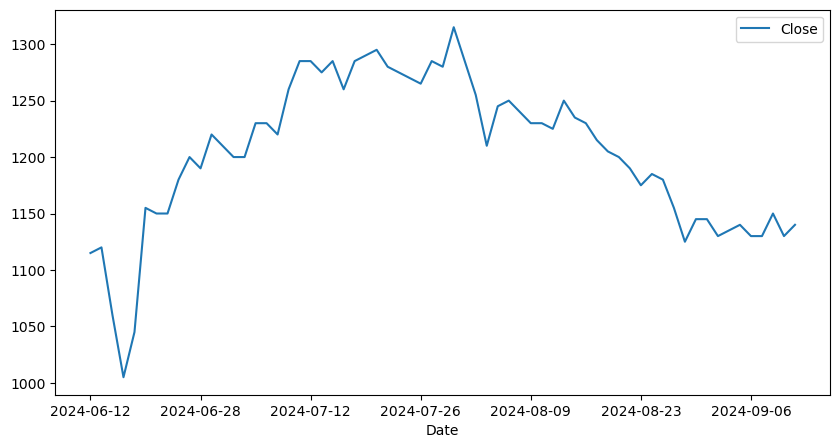

In [10]:
# data visualization
df.plot(figsize=(10,5))
plt.show()

C:\Users\THINKPAD X1 CAROBON\AppData\Local\Temp\ipykernel_28720\3200419598.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'] = df['Close'].fillna(method='ffill')


<Figure size 640x480 with 0 Axes>

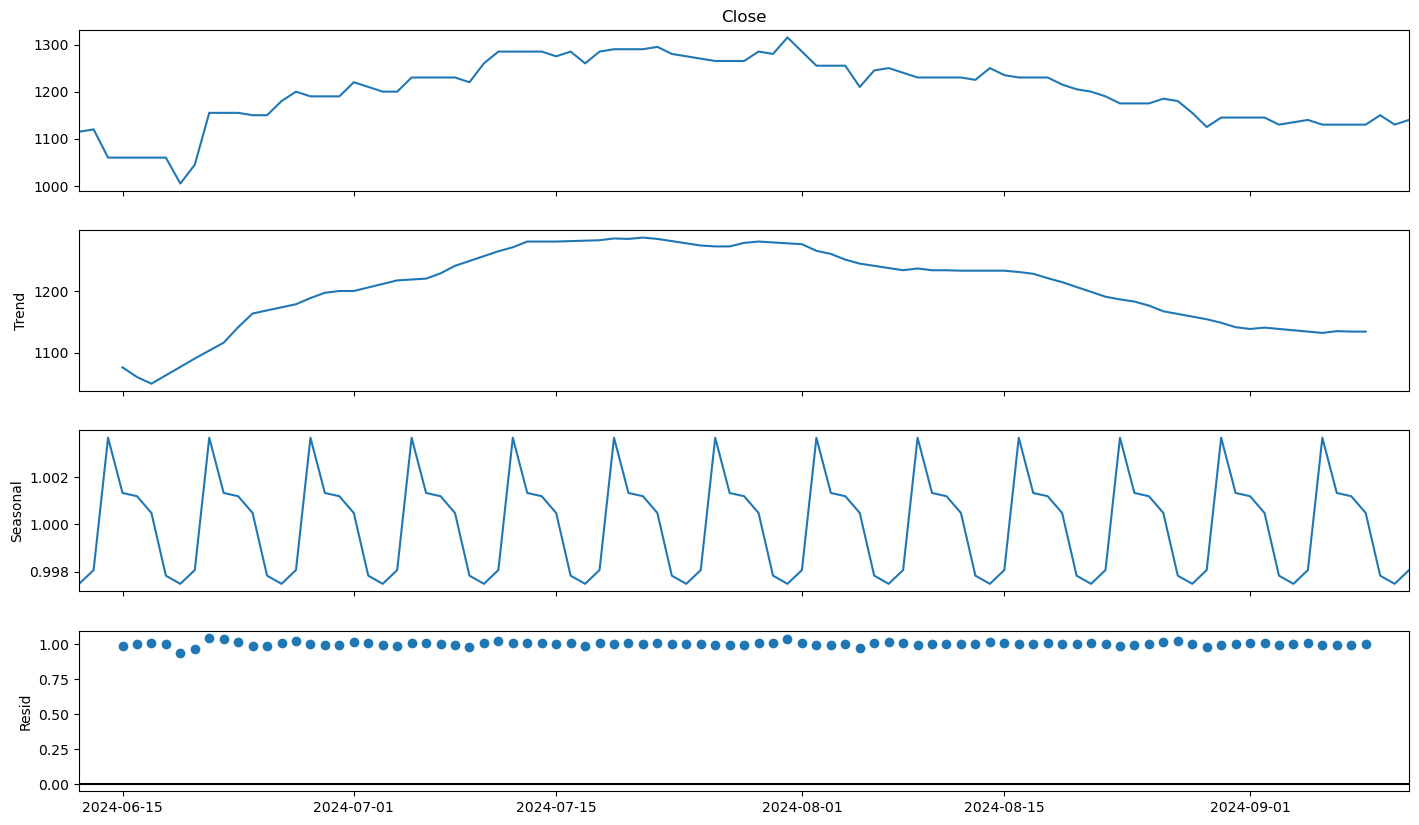

In [11]:
# handling missing value with mean
df['Close'] = df['Close'].fillna(df['Close'].mean())

# Convert the index to DatetimeIndex and infer the frequency
df.index = pd.to_datetime(df.index)  # Assuming the index still contains date strings
df = df.asfreq(pd.infer_freq(df.index)) # Infer the frequency

# Check and handle any remaining missing values after frequency inference
df['Close'] = df['Close'].fillna(method='ffill')

# decompose the components from the time series.
result = seasonal_decompose(df['Close'], model='multiplicative')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

# Stasionary

In [12]:
# create function to check stationarity
def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [13]:
# check stationarity of the dataset
check_stationarity(df['Close'])

ADF Statistic: -1.595640
p-value: 0.485783
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Non-stationary


In [14]:
# perform first order differencing
diff1 = df.diff().dropna()
check_stationarity(diff1)

ADF Statistic: -2.547315
p-value: 0.104382
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586
Non-stationary


In [15]:
# perform second order differencing
diff2 = diff1.diff().dropna()
check_stationarity(diff2)

ADF Statistic: -4.431245
p-value: 0.000261
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587
Stationary


# Modeling

In [16]:
# splitting dataset
train = df[:65]
test = df[65:]

print('Train size : ', train.shape)
print('Test size : ', test.shape)

Train size :  (65, 1)
Test size :  (28, 1)


In [17]:
# create ARIMA function to find best model
def find_best_model(train, num_p, num_d, num_q):
  df = pd.DataFrame()
  # default value
  pdq = [[],[],[]]
  aic = []
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(train, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

In [18]:
# find best model of ARIMA with combinations of p=4, d=4, q=4
find_best_model(df, 4, 4, 4)

c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users

(4,
 1,
 4,
 813.7124050689463,
      p  d  q          AIC
 109  4  1  4   813.712405
 64   2  2  4   814.887228
 88   3  2  3   815.101155
 89   3  2  4   816.789531
 69   2  3  4   817.870688
 ..  .. .. ..          ...
 70   2  4  0   961.343004
 1    0  0  1   962.318325
 45   1  4  0   999.241155
 20   0  4  0  1046.559062
 0    0  0  0  1053.810960
 
 [125 rows x 4 columns])

# Training and Evaluation with ARIMA

In [19]:
# train ARIMA with best combinations
arima = ARIMA(df, order=(4, 1, 4)).fit()
print('The AIC is ', arima.aic)

The AIC is  813.7124050689463


c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
# predict test-set
arima_pred_test = arima.predict(start="2024-08-16", end="2024-09-12", dynamic=True)
arima_pred_test = pd.DataFrame(arima_pred_test)
arima_pred_test.columns=['Close_predict']

act_vs_pred_arima = pd.concat([test, arima_pred_test], axis=1)
act_vs_pred_arima

,Close,Close_predict
Date,,
2024-08-16,1230.0,1234.751768
2024-08-17,1230.0,1242.028551
2024-08-18,1230.0,1234.416694
2024-08-19,1215.0,1228.304218
2024-08-20,1205.0,1233.795557
2024-08-21,1200.0,1236.382726
2024-08-22,1190.0,1240.853507
2024-08-23,1175.0,1233.702131
2024-08-24,1175.0,1229.333779


In [21]:
# check the MAE
print('MAE test  : ', mean_absolute_error(test, arima_pred_test))

MAE test  :  70.81291358155701


# Training and Evaluation with SARIMAX

In [22]:
# train SARIMAX with best combinations
sarimax = SARIMAX(df, order=(4, 1, 4),seasonal_order=(4, 1, 4, 28)).fit()
sarimax.summary()

c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   93
Model:             SARIMAX(4, 1, 4)x(4, 1, 4, 28)   Log Likelihood                -292.454
Date:                            Thu, 12 Sep 2024   AIC                            618.908
Time:                                    19:15:15   BIC                            655.609
Sample:                                06-12-2024   HQIC                           633.366
                                     - 09-12-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1529      0.570      0.268      0.788      -0.963       1.269
ar.L2          0.6003      0.293      2.046      0.041       0.025       1.175
ar.L3         -0.0533      0.321     -0.166      0.868      -0.682       0.576
ar.L4         -0.5370      0.498     -1.078      0.281      -1.513       0.439
ma.L1          0.1097     46.267      0.002      0.998     -90.571      90.791
ma.L2         -0.9876     24.468     -0.040      0.968     -48.944      46.969
ma.L3          0.0340     42.214      0.001      0.999     -82.704      82.771
ma.L4          0.9562     49.567      0.019      0.985     -96.193      98.106
ar.S.L28      -0.3641   6.55e+04  -5.56e-06      1.000   -1.28e+05    1.28e+05
ar.S.L56       0.1469   8.85e+04   1.66e-06      1.000   -1.73e+05    1.73e+05
ar.S.L84       0.0141   4.42e+04   3.19e-07      1.000   -8.66e+04    8.66e+04
ar.S.L112      0.0864   3.61e+04   2.39e-06      1.000   -7.07e+04    7.07e+04
ma.S.L28      -0.3645   6.54e+04  -5.58e-06      1.000   -1.28e+05    1.28e+05
ma.S.L56      -0.3946   8.51e+04  -4.64e-06      1.000   -1.67e+05    1.67e+05
ma.S.L84       0.0335    9.7e+04   3.45e-07      1.000    -1.9e+05     1.9e+05
ma.S.L112      0.1241   5.47e+04   2.27e-06      1.000   -1.07e+05    1.07e+05
sigma2       366.2813   4288.650      0.085      0.932   -8039.319    8771.882
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                14.27
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -0.43
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.75e+19. Standard errors may be unstable.
"""

In [23]:
# predict test-set
sar_pred_test = sarimax.predict(start="2024-08-16", end="2024-09-12", dynamic=True)
sar_pred_test = pd.DataFrame(sar_pred_test)
sar_pred_test.columns = ['Close_predict']

# concate with actual test-set
act_vs_pred_sar = pd.concat([test, sar_pred_test], axis=1)
act_vs_pred_sar

,Close,Close_predict
Date,,
2024-08-16,1230.0,1264.145132
2024-08-17,1230.0,1292.574817
2024-08-18,1230.0,1286.327363
2024-08-19,1215.0,1280.245634
2024-08-20,1205.0,1281.888191
2024-08-21,1200.0,1277.107209
2024-08-22,1190.0,1290.816313
2024-08-23,1175.0,1276.730273
2024-08-24,1175.0,1275.201592


In [24]:
# check the MAE
print('MAE test  : ', mean_absolute_error(test, sar_pred_test))

MAE test  :  127.0850700191518


# Inference

inference using ARIMA, because it has lower MAE.

In [25]:
# forecasting
forecast = arima.forecast(steps=12) #forecast periods

# get confidence intervals
forecast_results = arima.get_forecast(steps=12)
conf_int = forecast_results.conf_int(alpha=0.05)

# make as pandas series
forecast_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)

In [26]:
# predict September, 20 2024
forecast['2024-09-20':]

2024-09-20    1151.726939
2024-09-21    1146.706076
2024-09-22    1142.649909
2024-09-23    1145.422931
2024-09-24    1148.121949
Freq: D, Name: predicted_mean, dtype: float64

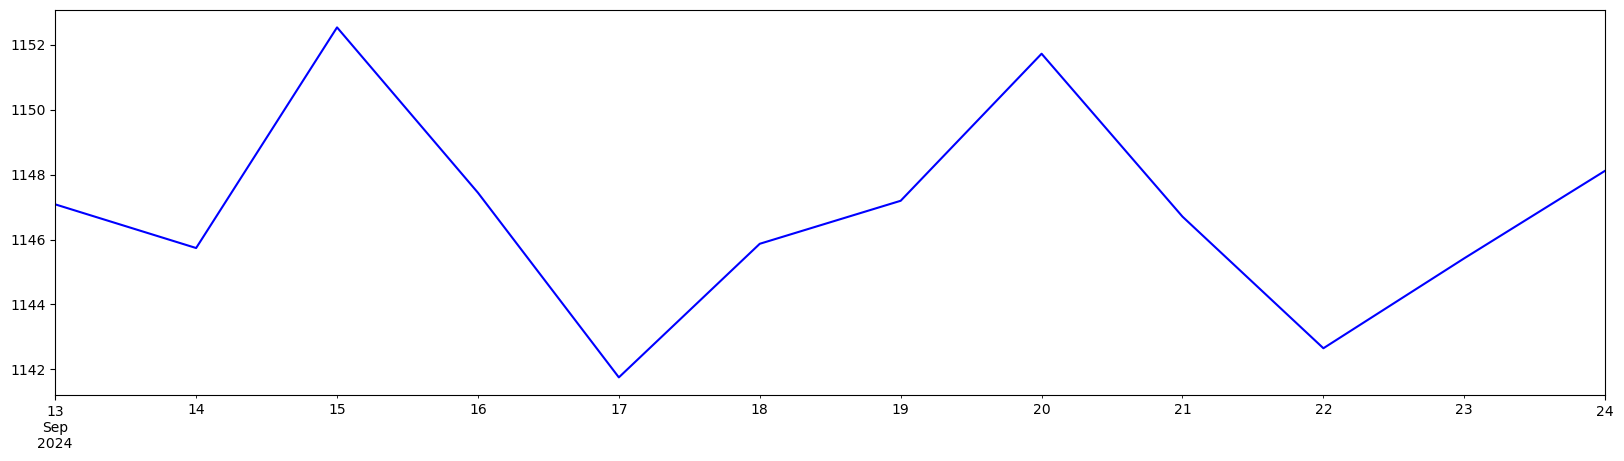

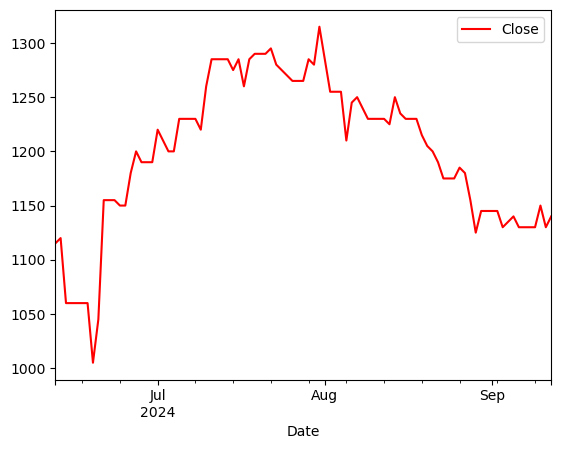

In [27]:
# make a forecast
forecast.plot(color='blue', label = 'forecast',figsize=(20,5))
df.plot(color='red',label = 'real')
plt.legend()